In [36]:
import numpy as np


def is_valid(data, target_mean, target_median, target_std, epsilon=0.1):
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    if abs(mean - target_mean) > epsilon:
        return False
    if abs(median - target_median) > epsilon:
        return False
    if abs(std - target_std) > epsilon:
        return False

    return True


def generate_data(target_mean, target_median, target_std, epsilon=0.1, min_value=0, max_value=100, max_iterations=10000):
    # generate a random initial data (with mean and std close to the target)
    data = np.random.normal(target_mean, target_std, 100).astype(int)
    np.random.binomial(1, 0.5, 100)
    iterations = 0

    while not is_valid(data, target_mean, target_median, target_std, epsilon):
        current_mean = np.mean(data)
        current_std = np.std(data)
        # generate a random number
        random_number = np.random.randint(0,100)
        # check if the new number let us closer to the target mean std
        if abs(current_mean - target_mean) > abs((current_mean + random_number) / (len(data) + 1) - target_mean) and \
                abs(current_std - target_std) > abs(np.std(data + [random_number]) - target_std):
            data.append(random_number)
        iterations += 1
        if iterations > max_iterations:
            break

    return data

target_mean = 78
target_median = 65
target_std = 16

data = generate_data(target_mean, target_median, target_std)
print(data)


[ 78  81  56  61  75  97  91  74  91  68  62  76  65  71  58  64  76 101
  81  81  99  93  97  66  84  51  67  71  87  65  63  67  92  47  75  65
  90  70  69 118  69  72  76  67  67  74  71  82  79  44  86  81  71  97
  66  87  75  77  75  54  91  86  68  89  61  73  66  70  63  92  63  75
  82  93  81  64  61  65  91  99  22  61  85  54 101  66  66  75  77  97
  79  67  65  82  85  65  77  68  69  92]


In [37]:
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print(f"mean: {mean}")
print(f"median: {median}")
print(f"std: {std}")

mean: 74.99
median: 74.5
std: 14.297199026382756


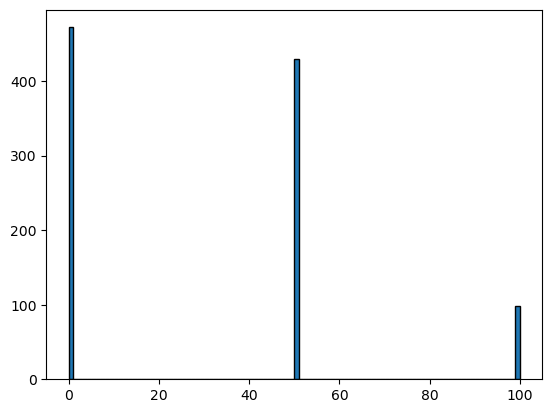

In [49]:
import matplotlib.pyplot as plt
n = 100  # number of trials
p = 0.8  # probability of success
size = 1000  # number of samples to generate

data_class1 = np.random.binomial(n, p, size)
plt.hist(data, bins=100, edgecolor='black')
plt.show()
